<a href="https://colab.research.google.com/github/atul219/Traffic_Signs/blob/master/Traffic_Signs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.


In [0]:
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout , Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import pickle
import random
import pandas as pd

In [0]:
np.random.seed(0)

In [0]:
# read file train 
with open('german-traffic-signs/train.p' , 'rb') as f:
  train_data = pickle.load(f)
  
# read validation data
with open('german-traffic-signs/valid.p' , 'rb') as f:
  val_data = pickle.load(f)
 
# read test data
with open('german-traffic-signs/test.p' , 'rb') as f:
  test_data = pickle.load(f)
  
  
print(type(train_data))
X_train , y_train = train_data['features'] , train_data['labels']
X_val , y_val = val_data['features'] , val_data['labels']
X_test , y_test = test_data['features'] , test_data['labels']

<class 'dict'>


In [0]:
print("Train data shape: ",X_train.shape)
print("Validation data shape: ",X_val.shape)
print("Test data shape: ",X_test.shape)
print(y_train.shape[0])

Train data shape:  (34799, 32, 32, 3)
Validation data shape:  (4410, 32, 32, 3)
Test data shape:  (12630, 32, 32, 3)
34799


In [0]:
# checking if this condition satisfy
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to number of labels"
assert(X_val.shape[0] == y_val.shape[0]), "The number of images is not equal to number of labels"
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to number of labels"

assert(X_train.shape[1:] == (32,32,3)), "The dimension of images are not 32*32*3"
assert(X_val.shape[1:] == (32,32,3)), "The dimension of images are not 32*32*3"
assert(X_test.shape[1:] == (32,32,3)), "The dimension of images are not 32*32*3"

In [0]:
X_train[1].shape

(32, 32, 3)

In [0]:
df = pd.read_csv('german-traffic-signs/signnames.csv')

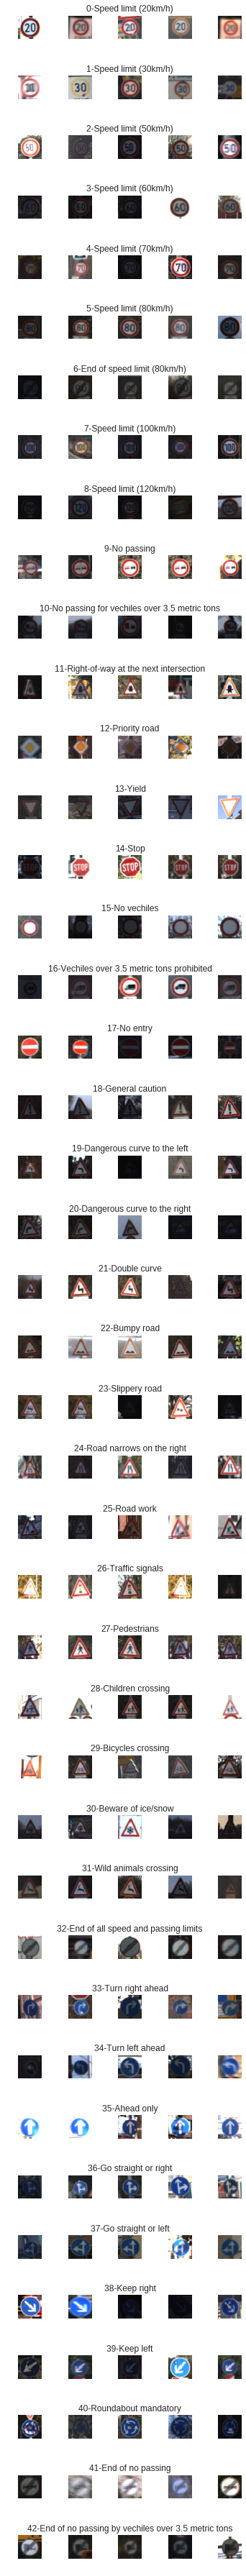

In [0]:
num_of_samples = []
 
cols = 5
num_classes = 43
 
fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 50))
fig.tight_layout()
for i in range(cols):
    for j , row in df.iterrows():
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j) + '-' + row['SignName'])
            num_of_samples.append(len(x_selected))

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


Text(0, 0.5, 'Number of images')

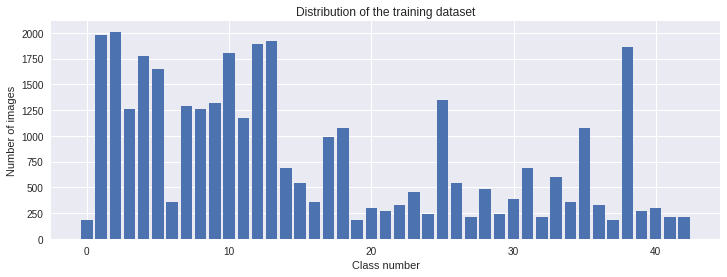

In [0]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

In [0]:
import cv2

36


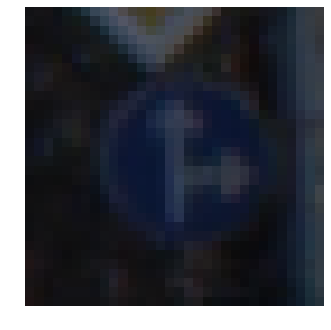

In [0]:
plt.imshow(X_train[1000])
plt.axis('off')
print(y_train[1000])

In [0]:
# convert image to gray
def gray_scale(img):
  img_gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
  
  return img_gray

#img_gray = gray_scale(X_train[990])
#plt.imshow(img_gray)


In [0]:
def equalize(img):
  img = cv2.equalizeHist(img)
  
  return img


#equalize_img = equalize(img_gray)
#plt.imshow(equalize_img)
#plt.axis('off')
#print(equalize_img.shape)

In [0]:
def preprocessing_to_data(img):
  gray = gray_scale(img)
  equalize_img = equalize(gray)
  
  # normalize the pixels
  img = equalize_img/255
  
  return img


In [0]:
X_train = np.array(list(map(preprocessing_to_data , X_train)))
X_val = np.array(list(map(preprocessing_to_data , X_val)))
X_test = np.array(list(map(preprocessing_to_data , X_test)))

X_train data Shape:  (34799, 32, 32)


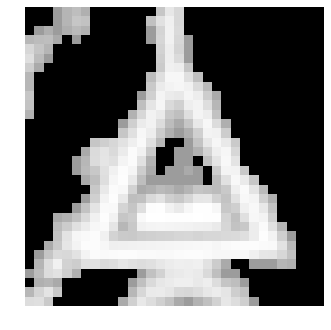

In [0]:
plt.imshow(X_train[random.randint(0 , len(X_train) - 1)])
plt.axis('off')
print("X_train data Shape: ", X_train.shape)

In [0]:
# add filters
# depth = 1
X_train = X_train.reshape(34799,32,32,1)
X_test = X_test.reshape(12630,32,32,1)
X_val = X_val.reshape(4410,32,32,1)
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(34799, 32, 32, 1)
(12630, 32, 32, 1)
(4410, 32, 32, 1)


In [0]:
# data augmentation
from keras.preprocessing.image import ImageDataGenerator

# if range is 0.1 then it means shifting can be of 10% 
# range is 2 then it means max no of pixel
# zoom out is 0.8 and zoom in is 1.2 for 0.2
# shear means angle 
data_gen = ImageDataGenerator(width_shift_range = 0.1,
                             height_shift_range = 0.1,
                             zoom_range = 0.2,
                             shear_range = 0.1,
                             rotation_range = 10)

data_gen.fit(X_train)

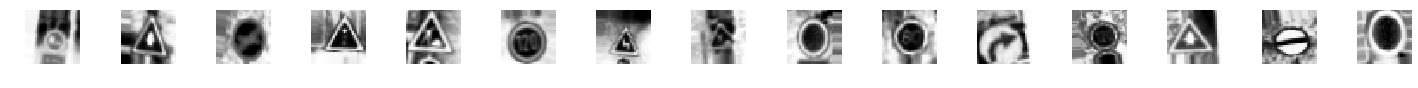

In [0]:
# to generate new images
batches = data_gen.flow(X_train , y_train , batch_size = 20)
X_batch , y_batch = next(batches)

fig,axs = plt.subplots(1,15 , figsize = (20,5))
fig.tight_layout()
for i in range(15):
  axs[i].imshow(X_batch[i].reshape(32,32))
  axs[i].axis('off')
  

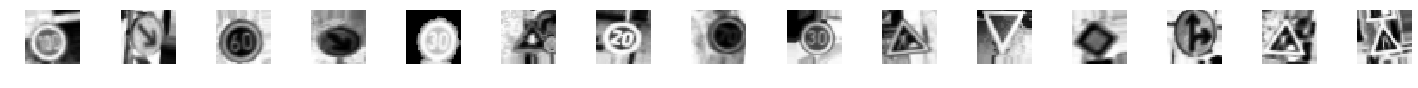

In [0]:
# to generate new images
batches = data_gen.flow(X_train , y_train , batch_size = 20)
X_batch , y_batch = next(batches)

fig,axs = plt.subplots(1,15 , figsize = (20,5))
fig.tight_layout()
for i in range(15):
  axs[i].imshow(X_batch[i].reshape(32,32))
  axs[i].axis('off')

In [0]:
# one hot encoded
y_train = to_categorical(y_train , 43)
y_test = to_categorical(y_test , 43)
y_val = to_categorical(y_val , 43)

In [0]:
def model():
  
  model = Sequential()
  
  model.add(Conv2D(60 , (5,5) , input_shape = (32,32,1) , activation = 'relu'))
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Conv2D(30, (3,3) , activation = 'relu'))
  model.add(MaxPooling2D(pool_size = (2,2)))
  
  # flat the image
  model.add(Flatten())
  
  model.add(Dense(500, activation = 'relu'))
  model.add(Dropout(0.5))
  model.add(Dense(43 , activation = 'softmax'))
  
  # compile model
  
  model.compile(Adam(lr = 0.001) , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
  
  return model

In [0]:
# fine tuning model
# optimizer learning rate 0.01 to 0.001
# no of filters in conv layer 30 tp 60 and 15 to 30
# add 2 new conv layer
# add dropout layer

In [0]:
def leNet_model():
  
  model = Sequential()
  
  model.add(Conv2D(60 , (5,5) , input_shape = (32,32,1) , activation = 'relu'))
  model.add(Conv2D(60 , (5,5) , activation = 'relu'))
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Conv2D(30, (3,3) , activation = 'relu'))
  model.add(Conv2D(30 , (3,3) ,activation = 'relu'))
  model.add(MaxPooling2D(pool_size = (2,2)))
  
  # dropout layer
 # model.add(Dropout(0.5))
  
  
  # flat the image
  model.add(Flatten())
  
  model.add(Dense(500, activation = 'relu'))
  model.add(Dropout(0.5))
  model.add(Dense(43 , activation = 'softmax'))
  
  # compile model
  
  model.compile(Adam(lr = 0.001) , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
  
  return model

In [0]:
model = leNet_model()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 4, 4, 30)          0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 480)               0         
__________

In [0]:
# history = model.fit(X_train , y_train , epochs = 10 , validation_data=(X_val , y_val) , batch_size = 400 , verbose = 1 , shuffle = 1)
history = model.fit_generator(data_gen.flow(X_train , y_train , batch_size = 50) , steps_per_epoch = 2000 ,epochs = 10 , validation_data = (X_val , y_val), shuffle = 1)

Epoch 1/10
2000/2000 [==============================] - 53s 27ms/step - loss: 0.9011 - acc: 0.7363 - val_loss: 0.1135 - val_acc: 0.9635
Epoch 2/10
2000/2000 [==============================] - 52s 26ms/step - loss: 0.2262 - acc: 0.9297 - val_loss: 0.0470 - val_acc: 0.9853
Epoch 3/10
2000/2000 [==============================] - 52s 26ms/step - loss: 0.1465 - acc: 0.9552 - val_loss: 0.0396 - val_acc: 0.9882
Epoch 4/10
2000/2000 [==============================] - 52s 26ms/step - loss: 0.1155 - acc: 0.9648 - val_loss: 0.0263 - val_acc: 0.9918
Epoch 5/10
2000/2000 [==============================] - 51s 26ms/step - loss: 0.1011 - acc: 0.9692 - val_loss: 0.0263 - val_acc: 0.9925
Epoch 6/10
2000/2000 [==============================] - 54s 27ms/step - loss: 0.0851 - acc: 0.9741 - val_loss: 0.0227 - val_acc: 0.9950
Epoch 7/10
2000/2000 [==============================] - 54s 27ms/step - loss: 0.0795 - acc: 0.9759 - val_loss: 0.0218 - val_acc: 0.9941
Epoch 8/10
2000/2000 [==========================

Text(0.5, 0, 'epochs')

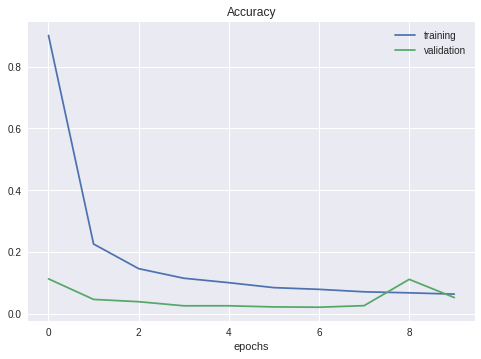

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training' , 'validation'])
plt.title('Accuracy')
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

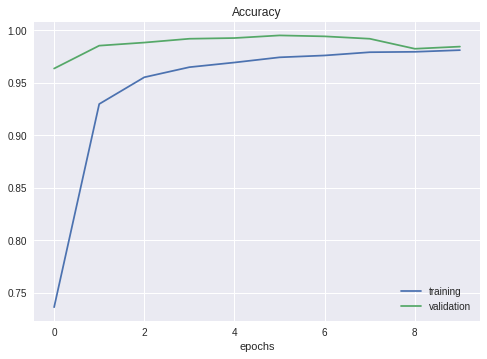

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training' , 'validation'])
plt.title('Accuracy')
plt.xlabel('epochs')

In [0]:
score = model.evaluate(X_test ,y_test , verbose = 0)
print('Test Score: ' , score[0])
print('Test Acccuracy: ', score[1])

Test Score:  0.15310326421232914
Test Acccuracy:  0.9707046714644534


In [0]:
# to test on new images 

import requests
from PIL import Image

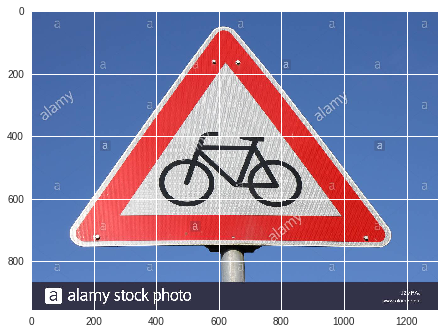

In [0]:
# fetch image
url_1 = 'https://c8.alamy.com/comp/G667W0/road-sign-speed-limit-30-kmh-zone-passau-bavaria-germany-G667W0.jpg'
url_2 = 'https://c8.alamy.com/comp/A0RX23/cars-and-automobiles-must-turn-left-ahead-sign-A0RX23.jpg'
url_3 = 'https://previews.123rf.com/images/bwylezich/bwylezich1608/bwylezich160800375/64914157-german-road-sign-slippery-road.jpg'
url_4 = 'https://previews.123rf.com/images/pejo/pejo0907/pejo090700003/5155701-german-traffic-sign-no-205-give-way.jpg'
url_5 = 'https://c8.alamy.com/comp/J2MRAJ/german-road-sign-bicycles-crossing-J2MRAJ.jpg'
r = requests.get(url_5 , stream = True)
img = Image.open(r.raw)
plt.imshow(img , cmap = plt.get_cmap('gray'))

(32, 32)


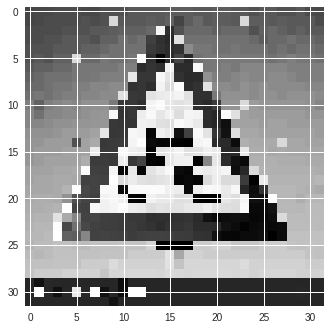

In [0]:
# preprocess image
img = np.array(img)
img = cv2.resize(img , (32,32))
test_img = preprocessing_to_data(img)
plt.imshow(test_img , cmap = plt.get_cmap('gray'))
print(test_img.shape)

In [0]:
# reshape image
test_img = test_img.reshape(1,32,32,1)
# to predict class of test image
print("Predicted Sign: " + str(model.predict_classes(test_img)))

Predicted Sign: [29]
